## Визуализация

Зачем оно нам надо?

Вспоминаем (или узнаем заново) материал из <a href = "https://drive.google.com/file/d/1htRh6_PBknB6oF7my8u-ILgNz0wtxIch/view"> ЛЕКЦИИ </a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Библиотека Matplotlib 
 - <a href="http://http://matplotlib.org/">matplotlib</a> - основная библиотека для базовой визуализации данных

### Характеристики графиков

#### Оформление
- Заголовок области рисования -> plt.title();
- Подпись оси абсцисс OX -> plt.xlabel();
- Подпись оси ординат OY -> plt.ylabel();
- Легенда -> plt.legend()
- Деления на оси абсцисс OX -> plt.xticks()
- Деления на оси ординат OY -> plt.yticks()

#### Размер:
- plt.figure(figsize = (width, heigth))  - задаем размер графика в дюймах 

### Виды графиков:

#### Ломаная линия
- plt.plot()

In [ ]:
x = pd.Series(list(range(10)))
y = x**4
#Постройте график по значениям y и x
plt.title('Содержательный заголовок')
plt.xlabel('Ось x')
#Подпишите ось y
plt.show()

#### Точечный график
- plt.scatter()

In [ ]:
plt.scatter(x,y)

#### Столбчатая диаграмма
- plt.bar()

In [ ]:

X = [1,0,8,3,4]
Y = [1,8,2,4,8]

#Задайте еще 2 вектора такой же размерности
X2 = # YOUR CODE HERE

Y2 = # YOUR CODE HERE


plt.bar(X,Y, label="Bar1", color='r')
#YOUR CODE HERE: график для X2 и Y2

#Подпишите название графика, названия осей и добавьте легенду:

#YOUR CODE HERE

plt.show()

Попробуем посмотреть другие варианты оформления (а заодно вспомним про циклы):

In [ ]:
x = np.arange(5)
y = np.random.randn(5)
vert_bars = plt.bar(x, y, color='lightblue', align='center')

# Можно покрасить часть столбцов в другой цвет
for bar, height in zip(vert_bars, y):
    if height < 0:
        bar.set(edgecolor='darkred', color='salmon', linewidth=3)

plt.show()

#### Круговая диаграмма
- plt.pie()

In [ ]:
# Задайте вектор, который будет содержать количество часов, которое Вы тратите на сон, еду, учебу/работу и развлечения (всего 4 значения)
slices = # YOUR CODE HERE


# Labels
activities = ['Сон','Еда','Учеба/Работа','Развлечения']

cols = ['c','m','r','pink']
plt.pie(slices, labels=activities, colors=cols)

plt.title # YOUR CODE HERE

plt.show()

#### Гистограмма
- plt.hist() - гистограмма

In [ ]:
from numpy.random import normal
sample = normal(size=1000)     #1000 значений из нормального распределения
plt.hist(sample)               
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

#### Boxplot (ящик с усами)

- plt.hist() - гистограмма

Построить боксплот по сгенерированной для гистограммы выборке

In [ ]:
# YOUR CODE HERE

## Библиотека seaborn
Это пакет-надстройка к matplotlib. Зачастую графики с помощью этой библиотеки строить проще и выглядят они красивее и эстетичнее

In [ ]:
import seaborn as sns

В seaborn можно менять стили

In [ ]:
sns.set_style("dark")
sns.distplot(sample)

In [ ]:
sns.set_style("whitegrid")
sns.distplot(sample)

In [ ]:
sns.set_style("dark")
sns.distplot(sample)

In [ ]:
sns.set_style("white")
sns.distplot(sample)

Тепловая карта:

In [ ]:
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

Можно настраивать цветовые палитры!
Палитры можно выбрать тут:

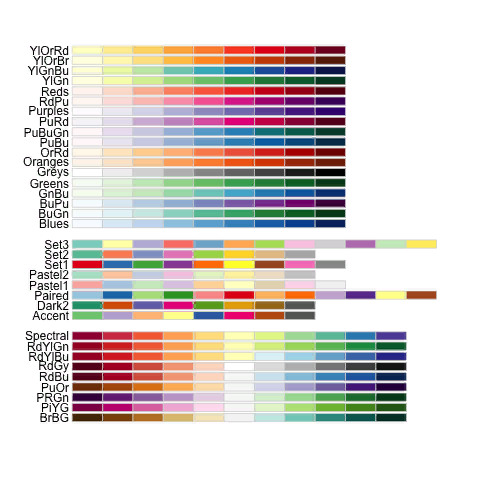

In [ ]:
df = sns.load_dataset('iris')
sns.boxplot( x=df["species"], y=df["sepal_length"], palette="Pastel1")

Или можно покрасить каждую часть в свой цвет:
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

In [ ]:
df = sns.load_dataset('iris')
my_pal = {"versicolor": "g", "setosa": "b", "virginica":"m"}
sns.boxplot( x=df["species"], y=df["sepal_length"], palette=my_pal)

## Самое время для самостоятельных заданий!

### Task 1

У Вас есть данные с различными характеристиками стран в файле countries.. Откройте его и постройте гистограмму, которая будет отражать распределение процента жителей, находящихся за чертой бедности. Подпишите оси, придумайте содержательное название, выберите сами цвет гистограммы.

### Task 2

Откройте файл с данными по результатам экзаменов examscore. Постройте боксплоты для баллов по математике так, чтобы на одном графике было отображено 5 боксплотов (свой для каждой группы). Выберите цветовую палитру или покрасьте каждый боксплот в свой цвет по Вашему усмотрению.

### Task 3

С помощью точечной диаграммы отобразите график взаимосвязи баллов по чтению и баллов по письму.

## Task 4

In [1]:
#Задание на тепловую карту

# Снижение размерности

Начнем с PCA -метода главных компонент

Зачем это нужно? Для уменьшения размерности данных.

Проанализируем винишко:

Давайте откроем наши данные и посмотрим на первые строчки:

In [ ]:
WineData = pd.read_csv('wine.data.csv')
WineData.head(10)

Посмотрим на то, как изменяются характеристики вина (не бойтесь, дальше мы научимся строить боксплоты, так что сначала просто посмотрим):

In [ ]:
for c in WineData.columns[1:]:
    WineData.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Класс вина", fontsize=16)

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(WineData['OD280/OD315 of diluted wines'],WineData['Flavanoids'],c=WineData['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Точечная диаграмма, отображающая разделение сортов вин по классам",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X = WineData.drop('Class',axis=1)
y = WineData['Class']

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
dfx = pd.DataFrame(data=X,columns=WineData.columns[1:])

In [ ]:
dfx.head(10)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=None)

In [ ]:
dfx_pca = pca.fit(dfx)

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Процент объясненной дисперсии",fontsize=25)
plt.xlabel("Компоненты",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Объясненная дисперсия",fontsize=15)
plt.show()

In [ ]:
dfx_trans = pca.transform(dfx)

In [ ]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=WineData['Class'],edgecolors='b',alpha=0.75,s=150)
plt.grid(True)
plt.title("Разделение на классы с помощью 2 компонентов",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()